In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [3]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
input_img = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)
encoded = layers.MaxPooling2D((2, 2), padding="same")(x)

In [8]:
x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
history = autoencoder.fit(
    x_train, x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.5987 - val_loss: 0.5696
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.5679 - val_loss: 0.5657
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.5646 - val_loss: 0.5629
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.5619 - val_loss: 0.5642
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.5611 - val_loss: 0.5610
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.5605 - val_loss: 0.5605
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.5597 - val_loss: 0.5607
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.5600 - val_loss: 0.5598
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.5595 - val_loss: 0.5606
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.5590 - val_loss: 0.5611


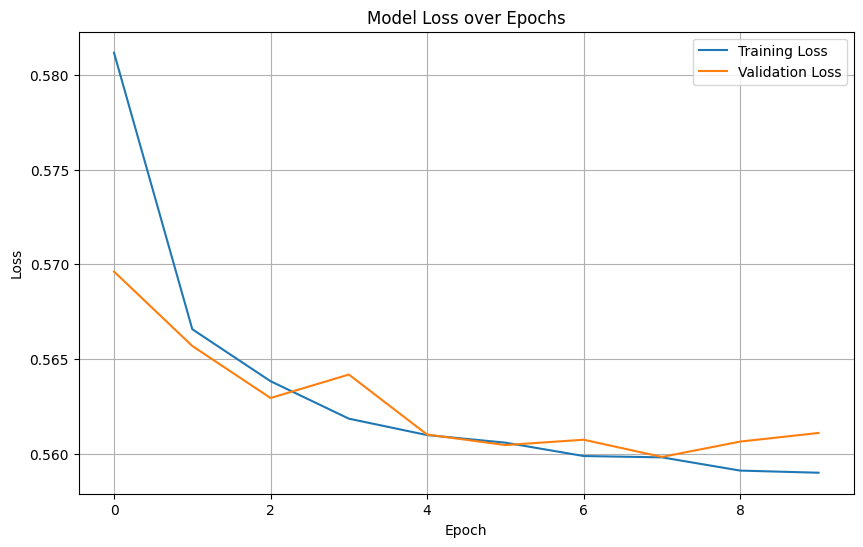

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


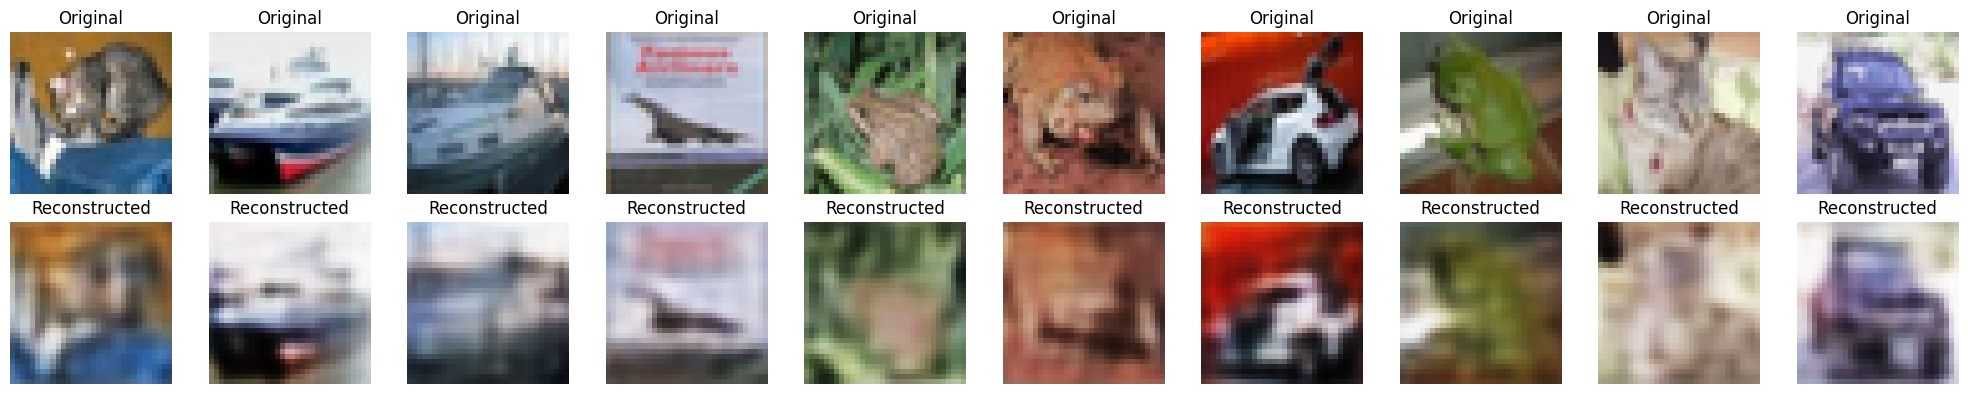

In [13]:
n = 10  # number of images to display
plt.figure(figsize=(20, 4))  # wider layout

for i in range(n):
    # top row: original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")

    # bottom row: reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis("off")

plt.tight_layout()
plt.show()